# **Colab : [link](https://colab.research.google.com/drive/1eiIBPFjw7rGceUGyHMlyquokG28a52gR?usp=sharing)**

# **Portfolio : [link](https://praveendevportfolio.netlify.app/)**

# **Problem Statement**



*  Find publicly available data for key factors that influence US home prices nationally.

* Build a data science model that explains how these factors impacted home prices over the last 20
years.

* Use the S&P Case-Schiller Home Price Index as a proxy for home prices



# **Data Collection**


**Websites from Data Were Sourced :   [LINK](https://fred.stlouisfed.org/series/CSUSHPISA)**



**`Required Libs`**

In [172]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from functools import reduce

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor

import warnings

warnings.filterwarnings("ignore")

**`Pandas Display Option`**

In [173]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**`Dataframes`**

**Feature Chosen For Predictive Model**



* Zillow Home Value Index (USAUCSFRCONDOSMSAMID) :



```
   Why i choosen ?

   Median merket value of all homes , reflects overall trend in home values ,providing insights about market conditions , price movement.
```





* Average Sales Price for New Houses Sold (ASPNHSUS):



```
  Why i choosen ?

   Reflects the Average cost of newly constructed homes , influencing perceptions of the affordability of new housing .
```



* Median Sales Price for New Houses Sold (MSPNHSUS) :



```
  why i choosen ?

   Provides insights about typical price of new house sold , helps to understand distribution
```




* Total Construction Spending: Residential (TLRESCONS):



```
  why i choosen ?

   Reflects the level of investment in residential construction, influencing housing supply and potentially affecting home prices
```



* Gross Domestic Income (GDI):



```
 why i choosen ?
  
   Influnces economic conditions and affecting consumer confidence for buying houses.
```



* Consumer Price Index for All Urban Consumers: Housing (CPIHOSNS) :



```
 why i choosen ?

   Indicates inflation in housing costs , affecting housing affordability , potentially impacting home prices
```



* Total Population: All Ages (POP) :



```
  why i choosen ?

   Population Growth influneces housing demand , potentially affecting home prices
```



* National Totals of State and Local Tax Revenue: Property Taxes (QTAXT01QTAXCAT1USNO) :

```
 why i choosen ?

   Property taxes of house influencing the overall cost of living
```


   
* New Privately-Owned Housing Units Authorized (PERMIT):

```
 why i choosen ?

   Authorized housing units can influences the home price and increase demand
```



* Monthly Supply of New Houses (MSACSR):

```
  why i choosen ?

   Reflects the balance  between housing supply and demand , based on demand the home price index affects
```




* 30-Year Fixed Rate Mortgage Average (MORTGAGE30US) :

```
  why i choosen ?

   Provides insights about fixed interest rate for 30 years that the buyers can afford for loan.
```




* University of Michigan: Consumer Sentiment (UMCSENT):

```
  why i choosen ?
   
    Provides insights how consumer sentiment about economy and housing market
```



* Unemployed Population: Aged 25-54 (LFUN25TTUSM647S) and Unemployment Rate (UNRATE):


```
  why i choosen ?

    Influneces job security , more job security better the purchasing ability
```



* Housing Inventory Estimate: Vacant Units (EVACANTUSQ176N)

```
  why i choosen ?

    Provides insights about vacant units availablity , market condition , supply and demand balance
```



* Federal Funds Effective Rate (FEDFUNDS):

```
  why i choosen ?

    Chaning in federal reserve ,  adjusts the federal funds rate may influnces the mortage rate
```




In [174]:
CSUSHPISA            = pd.read_csv('/content/drive/MyDrive/Home_LLC/CSUSHPISA.csv')

ASPNHSUS             = pd.read_csv('/content/drive/MyDrive/Home_LLC/ASPNHSUS .csv')

CPIHOSNS             = pd.read_csv('/content/drive/MyDrive/Home_LLC/CPIHOSNS.csv')

EVACANTUSQ176N       = pd.read_csv('/content/drive//MyDrive/Home_LLC/EVACANTUSQ176N.csv')

GDI                  = pd.read_csv('/content/drive/MyDrive/Home_LLC/GDI.csv')

GDP                  = pd.read_csv('/content/drive/MyDrive/Home_LLC/GDP.csv')

LFUN25TTUSM647S      = pd.read_csv('/content/drive/MyDrive/Home_LLC/LFUN25TTUSM647S.csv')

MORTGAGE30US         = pd.read_csv('/content/drive/MyDrive/Home_LLC/MORTGAGE30US.csv')

MSACSR               = pd.read_csv('/content/drive/MyDrive/Home_LLC/MSACSR.csv')

MSPNHSUS             = pd.read_csv('/content/drive/MyDrive/Home_LLC/MSPNHSUS.csv')

PERMIT               = pd.read_csv('/content/drive/MyDrive/Home_LLC/PERMIT.csv')

POP                  = pd.read_csv('/content/drive/MyDrive/Home_LLC/POP.csv')

QTAXT01QTAXCAT1USNO  = pd.read_csv('/content/drive/MyDrive/Home_LLC/QTAXT01QTAXCAT1USNO.csv')

TLRESCONS            = pd.read_csv('/content/drive/MyDrive/Home_LLC/TLRESCONS.csv')

USAUCSFRCONDOSMSAMID = pd.read_csv('/content/drive/MyDrive/Home_LLC/USAUCSFRCONDOSMSAMID.csv')

UMCSENT              = pd.read_csv('/content/drive/MyDrive/Home_LLC/UMCSENT.csv')

UNRATE               = pd.read_csv('/content/drive/MyDrive/Home_LLC/UNRATE.csv')

FEDFUNDS             = pd.read_csv('/content/drive/MyDrive/cluade_dataset/FEDFUNDS.csv')

In [175]:
dataframes = [CSUSHPISA,ASPNHSUS,CPIHOSNS,EVACANTUSQ176N,GDI,GDP,LFUN25TTUSM647S,MORTGAGE30US,MSACSR,MSPNHSUS,PERMIT,POP,QTAXT01QTAXCAT1USNO,TLRESCONS,USAUCSFRCONDOSMSAMID,UMCSENT,UNRATE,FEDFUNDS]



```
# Note : I have combined the datasets based on common feature "DATE".
```



In [176]:
merged_df = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='left'), dataframes)

In [177]:
merged_df.head()

,DATE,CSUSHPISA,ASPNHSUS,CPIHOSNS,EVACANTUSQ176N,GDI,GDP,LFUN25TTUSM647S,MORTGAGE30US,MSACSR,MSPNHSUS,PERMIT,POP,QTAXT01QTAXCAT1USNO,TLRESCONS,USAUCSFRCONDOSMSAMID,UMCSENT,UNRATE,FEDFUNDS
0,2003-01-01,128.461,230200.0,182.3,14908.0,11245.795,11174.129,4922000.0,NaN,4.0,181700.0,1808.0,289518.0,77737.0,423049.0,147458.606076,82.4,5.8,1.24
1,2003-02-01,129.355,233400.0,183.2,NaN,NaN,NaN,5102000.0,NaN,4.5,187000.0,1854.0,289714.0,NaN,422705.0,148240.809836,79.9,5.9,1.26
2,2003-03-01,130.148,231100.0,184.3,NaN,NaN,NaN,5092000.0,NaN,4.1,185100.0,1757.0,289911.0,NaN,418232.0,149022.590076,77.6,5.9,1.25
3,2003-04-01,130.884,237200.0,184.1,15244.0,11377.023,11312.766,5097000.0,NaN,4.1,189500.0,1803.0,290125.0,56873.0,425493.0,149873.699907,86.0,6.0,1.26
4,2003-05-01,131.735,243700.0,184.5,NaN,NaN,NaN,5199000.0,NaN,3.9,195500.0,1835.0,290346.0,NaN,426270.0,150810.139042,92.1,6.1,1.26


In [178]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  241 non-null    object 
 1   CSUSHPISA             241 non-null    float64
 2   ASPNHSUS              241 non-null    float64
 3   CPIHOSNS              241 non-null    float64
 4   EVACANTUSQ176N        81 non-null     float64
 5   GDI                   81 non-null     float64
 6   GDP                   81 non-null     float64
 7   LFUN25TTUSM647S       241 non-null    float64
 8   MORTGAGE30US          32 non-null     float64
 9   MSACSR                241 non-null    float64
 10  MSPNHSUS              241 non-null    float64
 11  PERMIT                241 non-null    float64
 12  POP                   241 non-null    float64
 13  QTAXT01QTAXCAT1USNO   81 non-null     float64
 14  TLRESCONS             241 non-null    float64
 15  USAUCSFRCONDOSMSAMID  2

# **Data Cleaning**

**`Total Missing values`**

In [179]:
merged_df.isnull().sum()

DATE                      0
CSUSHPISA                 0
ASPNHSUS                  0
CPIHOSNS                  0
EVACANTUSQ176N          160
GDI                     160
GDP                     160
LFUN25TTUSM647S           0
MORTGAGE30US            209
MSACSR                    0
MSPNHSUS                  0
PERMIT                    0
POP                       0
QTAXT01QTAXCAT1USNO     160
TLRESCONS                 0
USAUCSFRCONDOSMSAMID      0
UMCSENT                   0
UNRATE                    0
FEDFUNDS                  0
dtype: int64

In [180]:
MORTGAGE30US   = pd.read_csv('/content/drive/MyDrive/Home_LLC/MORTGAGE30US.csv')

MORTGAGE30US['DATE'] = pd.to_datetime(MORTGAGE30US['DATE'])

MORTGAGE30US['Month'] = MORTGAGE30US['DATE'].dt.month

MORTGAGE30US['Year'] = MORTGAGE30US['DATE'].dt.year

result = MORTGAGE30US.groupby(['Month', 'Year'])['MORTGAGE30US'].mean().reset_index()

result['Date'] = pd.to_datetime(result['Year'].astype(str) + '-' + result['Month'].astype(str) + '-01')

result = result.sort_values(by='Date').reset_index(drop=True)

result.drop(['Month','Year'],axis=1,inplace=True)

result.to_csv('MORTGAGE30US.csv',index=False)

MORTGAGE30US  = pd.read_csv('/content/MORTGAGE30US.csv')

MORTGAGE30US.Date = MORTGAGE30US.Date.apply(lambda x : str(x))

MORTGAGE30US.columns = ['MORTGAGE30US','DATE']

In [181]:
dataframes = [CSUSHPISA,ASPNHSUS,CPIHOSNS,EVACANTUSQ176N,GDI,GDP,LFUN25TTUSM647S,MORTGAGE30US,MSACSR,MSPNHSUS,PERMIT,POP,QTAXT01QTAXCAT1USNO,TLRESCONS,USAUCSFRCONDOSMSAMID,UMCSENT,UNRATE,FEDFUNDS]

In [182]:
merged_df = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='left'), dataframes)

**QTAXT01QTAXCAT1USNO Feature**

In [183]:
merged_df['QTAXT01QTAXCAT1USNO'] = merged_df['QTAXT01QTAXCAT1USNO'].ffill()

**EVACANTUSQ176N Feature**

In [184]:
merged_df['EVACANTUSQ176N']  = merged_df['EVACANTUSQ176N'].ffill()

**GDI Feature**

In [185]:
merged_df['GDI']  = merged_df['GDI'].ffill()

**GDP Feature**

In [186]:
merged_df['GDP'] = merged_df['GDP'].ffill()


**Missing Value Imputation**

```
# QTAXT01QTAXCAT1USNO  , EVACANTUSQ176N , GDI , GDP these feature has quaterly wise data so here i filled missing values with same data for each quater

# Example : jan , feb , march will have the same value

# Note : According to the client , this value replacement method would change .
```



**MORTGAGE30US Feature**

In [187]:
merged_df_null = merged_df[merged_df.isnull().any(axis=1)]

mf = merged_df.copy()

mf = mf.dropna()

In [188]:
mf['DATE'] = pd.to_datetime(mf['DATE'])

mf['Month'] = mf['DATE'].dt.month

mf['Year'] = mf['DATE'].dt.year

mf['Day'] = mf['DATE'].dt.day

mf.drop('DATE',axis=1,inplace=True)


merged_df_null ['DATE'] = pd.to_datetime(merged_df_null ['DATE'])

merged_df_null ['Month'] = merged_df_null ['DATE'].dt.month

merged_df_null ['Year'] = merged_df_null ['DATE'].dt.year

merged_df_null ['Day'] = merged_df_null ['DATE'].dt.day

merged_df_null.drop('DATE',axis=1,inplace=True)

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

merged_df['Month'] = merged_df['DATE'].dt.month

merged_df['Year'] = merged_df['DATE'].dt.year

merged_df['Day'] = merged_df['DATE'].dt.day

In [189]:
X = mf.drop('MORTGAGE30US',axis=1)

y = mf['MORTGAGE30US']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor().fit(X_train, y_train)


predictions = model.predict(merged_df_null.drop('MORTGAGE30US',axis=1))

predictions


array([5.801965])

In [190]:
merged_df['MORTGAGE30US'].fillna(predictions[0],inplace=True)


**Missing Value Imputation**

```
# For MORTGAGE30US i have used ml model to predict the missing value and used that value to fill
```



**`Total Missing values`**


In [191]:
merged_df.isnull().sum().sum()

0

# **EDA**

## **Correlation**

In [192]:
merged_df.corr()[0:1].T

,CSUSHPISA
CSUSHPISA,1.000000
ASPNHSUS,0.944233
CPIHOSNS,0.855823
EVACANTUSQ176N,-0.595280
GDI,0.862597
GDP,0.861563
LFUN25TTUSM647S,-0.465347
MORTGAGE30US,-0.202968
MSACSR,0.128974
MSPNHSUS,0.934814


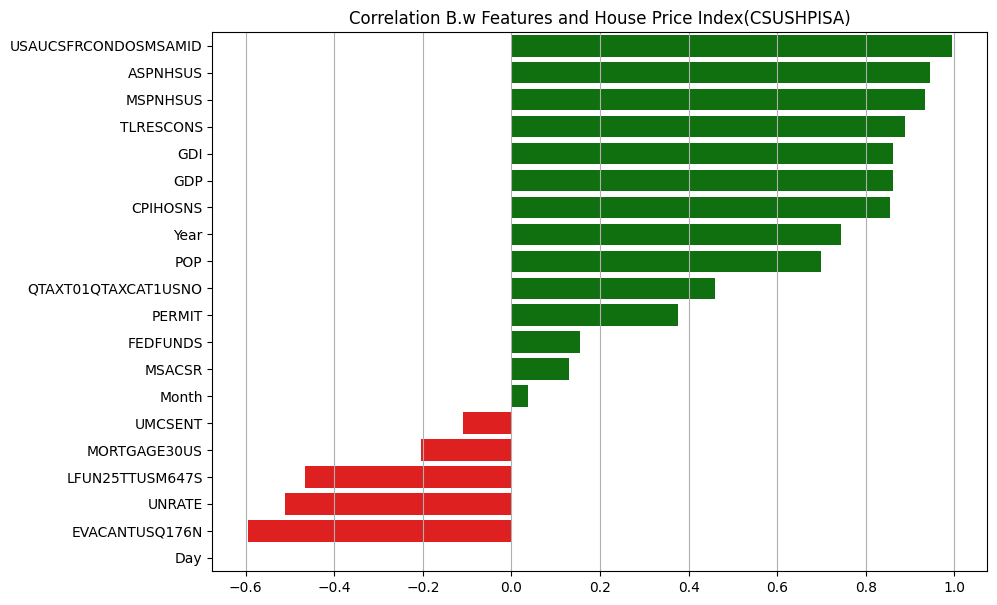

In [193]:
Feature_Name = merged_df.corr()[0:1].T.index.to_list()
Feature_corr = merged_df.corr()[0:1].T.values.reshape(-1)

feature_correlationvalue = {}


for i in range(len(Feature_corr)):
     feature_correlationvalue.update({Feature_Name[i]:Feature_corr[i]})

del feature_correlationvalue['CSUSHPISA']

sorted_feature_correlationvalue  = dict(sorted(feature_correlationvalue.items(),key=lambda item : item[1],reverse=True))
plt.figure(figsize=(10, 7))

correlation_values = [i for i in sorted_feature_correlationvalue.values()]

feature_names = [i for i in sorted_feature_correlationvalue.keys()]

colors = ['red' if value < 0 else 'green' for value in correlation_values]

plt.grid(True)

sns.barplot(x=correlation_values, y=feature_names, palette=colors).set(title='Correlation B.w Features and House Price Index(CSUSHPISA)')

plt.show()





**Correlation Explanation**







**Strong Positive Correlation:**

```
# USAUCSFRCONDOSMSAMID (Zillow Home Value Index): 0.9952

    Very strong correlation b.w ZHVI and HPI , so it tells ZHVI increases HPI tend to inceases

# ASPNHSUS (Average Sales Price for New Houses Sold): 0.9442

    Very Strong positive correlation b.w Mean sales price and HPI so HPI tend to increase

# MSPNHSUS (Median Sales Price for New Houses Sold): 0.9348

    Similar to ASPNHSUS , the MSPNHSUS has strong positve correlation

```

**Moderate Positive Correlation:**



```
# GDI (Gross Domestic Income): 0.8626


# TLRESCONS (Total Construction Spending - Residential): 0.8879

```

**Weak Positive Correlation:**



```
# POP (Total Population): 0.6990

# QTAXT01QTAXCAT1USNO (Property Taxes): 0.4591
```

**Moderate Negative Correlation**



```
#  EVACANTUSQ176N (Housing Inventory Estimate: Vacant Units): -0.5953

     This indicates that increasing in vacant housing units may tend to decrease the house price


# UNRATE (Unemployment Rate): -0.5107

    Unemployment rate increase the HPI tend to decrease


# LFUN25TTUSM647S (Unemployed Population: Aged 25-54): -0.4653

   Unemployment rate of population 25-54 increase the HPI tend to decrease

    
```
**Weak Negative Correlation**

```
# 30-Year Fixed Rate Mortgage Average (MORTGAGE30US): -0.2030

  Mortage rate increase might be decrease the HPI
```







## **Outliers Detection**

In [194]:
merged_df.dtypes

DATE                    datetime64[ns]
CSUSHPISA                      float64
ASPNHSUS                       float64
CPIHOSNS                       float64
EVACANTUSQ176N                 float64
GDI                            float64
GDP                            float64
LFUN25TTUSM647S                float64
MORTGAGE30US                   float64
MSACSR                         float64
MSPNHSUS                       float64
PERMIT                         float64
POP                            float64
QTAXT01QTAXCAT1USNO            float64
TLRESCONS                      float64
USAUCSFRCONDOSMSAMID           float64
UMCSENT                        float64
UNRATE                         float64
FEDFUNDS                       float64
Month                            int64
Year                             int64
Day                              int64
dtype: object

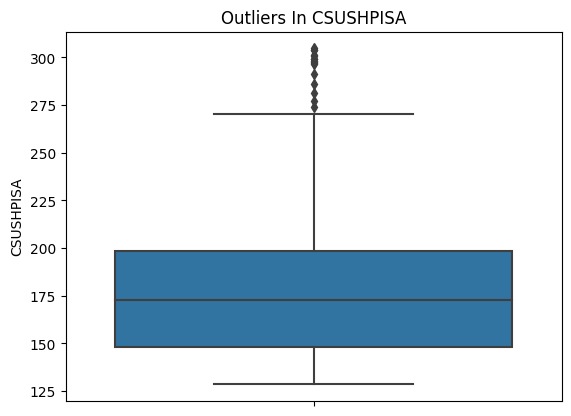

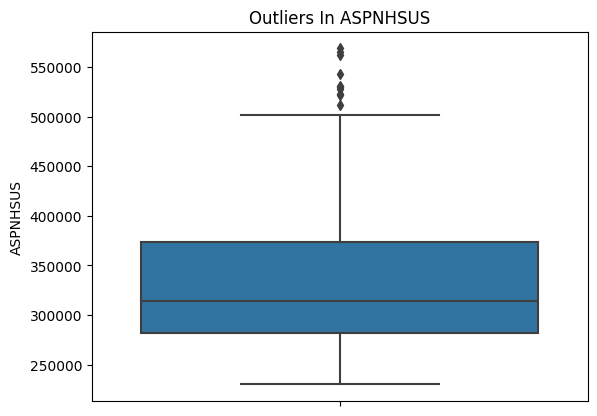

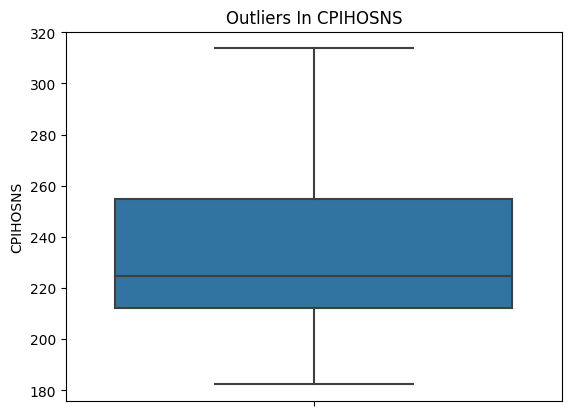

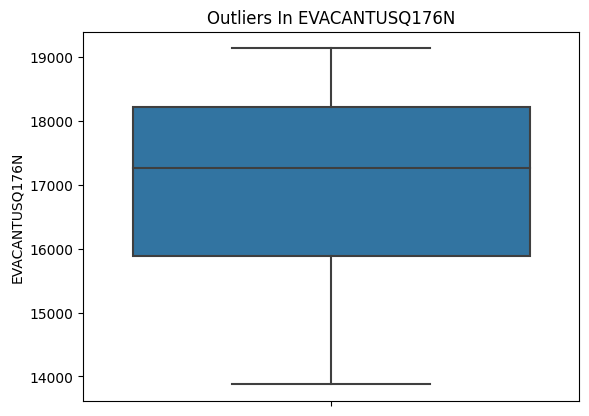

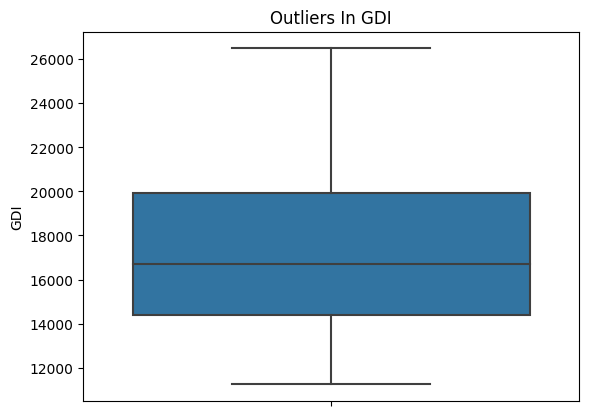

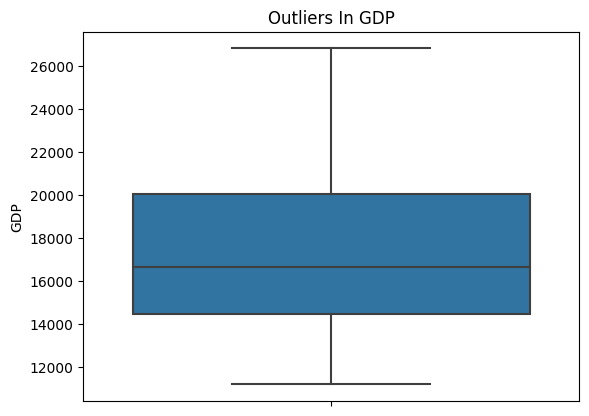

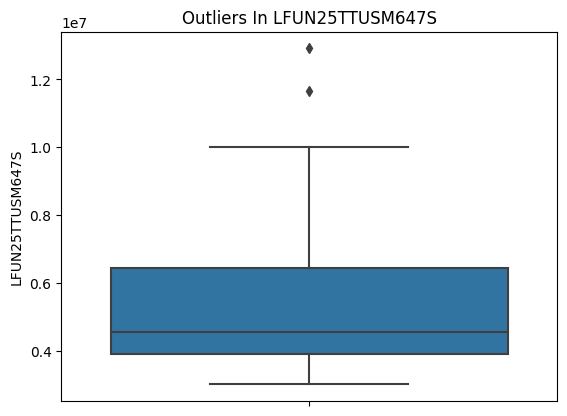

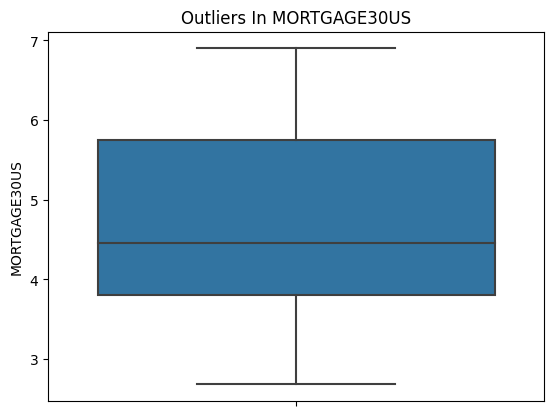

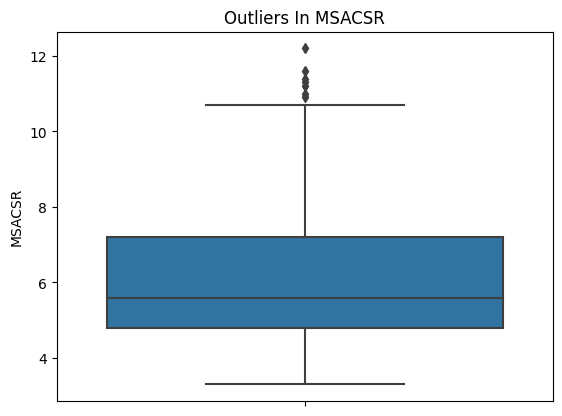

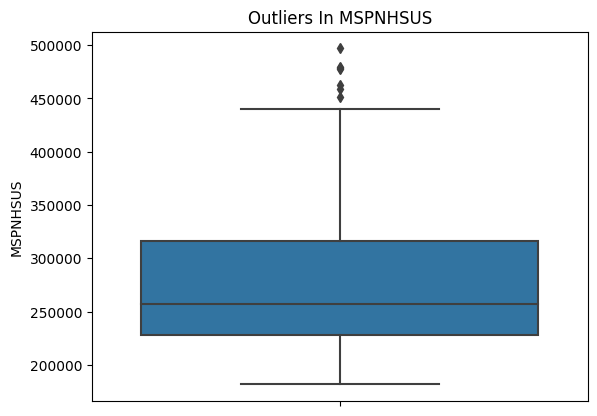

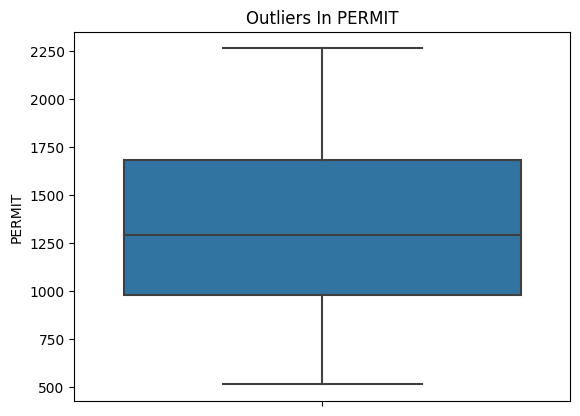

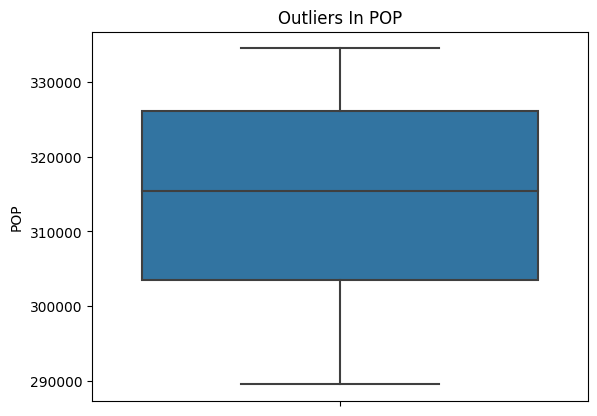

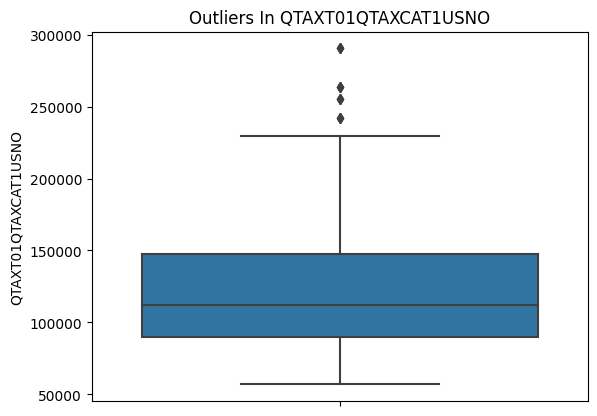

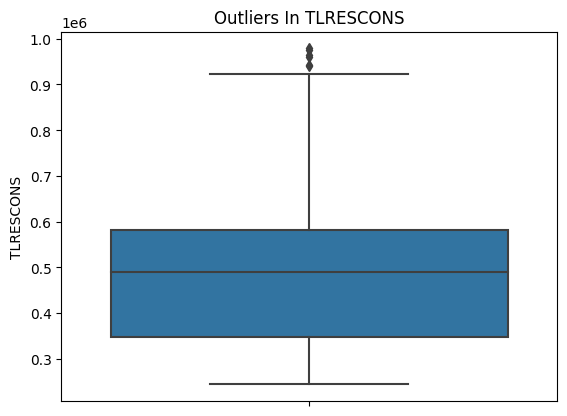

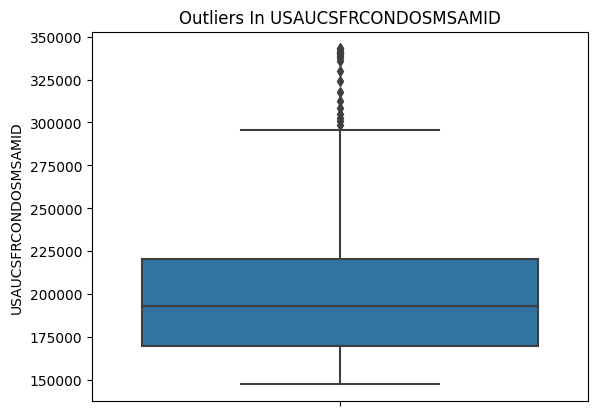

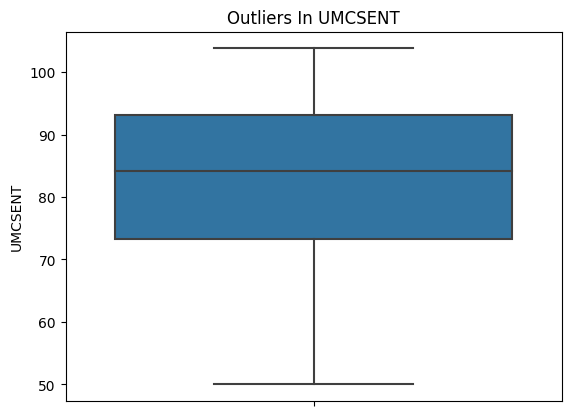

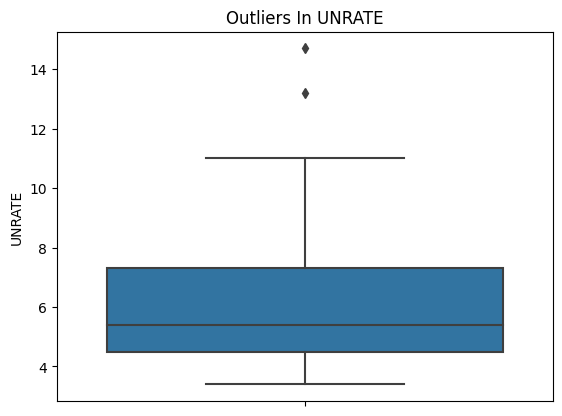

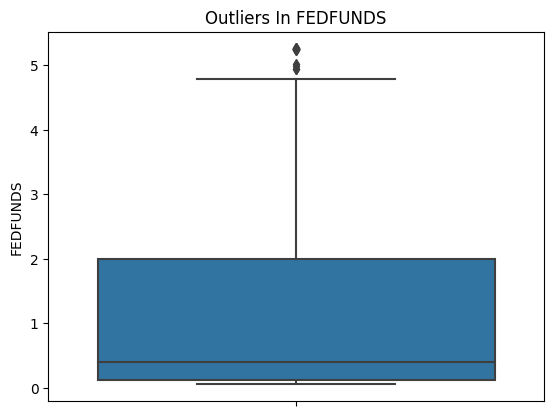

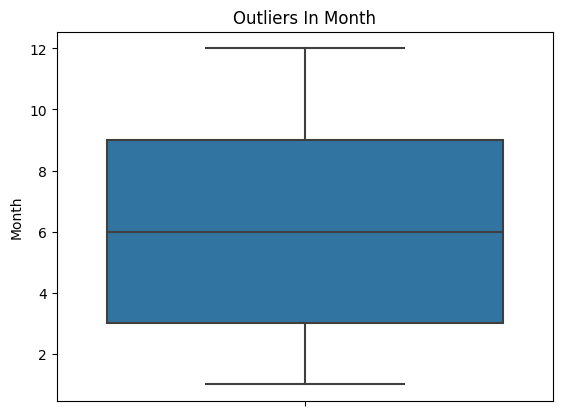

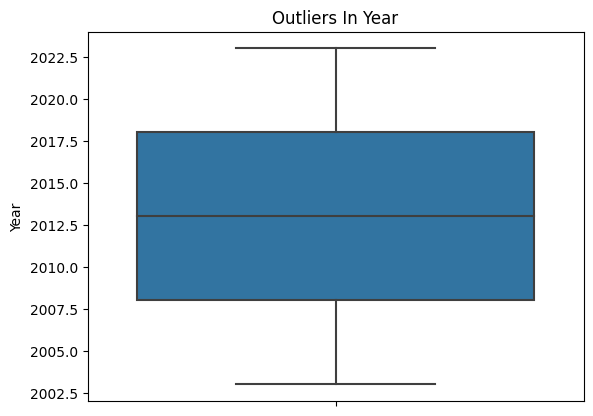

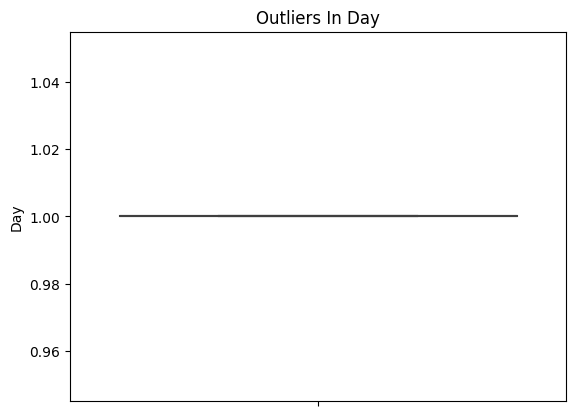

In [195]:
for i in merged_df.drop('DATE',axis=1).columns:
  sns.boxplot(data = merged_df , y=i)
  plt.title(f'Outliers In {i}')
  print()
  print()
  plt.show()

**`Note`**


* Here  I have not used any methods to handle outliers because its based on client considerations that how the outliers should be handled.
        
* moreover i did not get any requirement regarding this.




## **POP vs MORTAGES30US vs HPI**

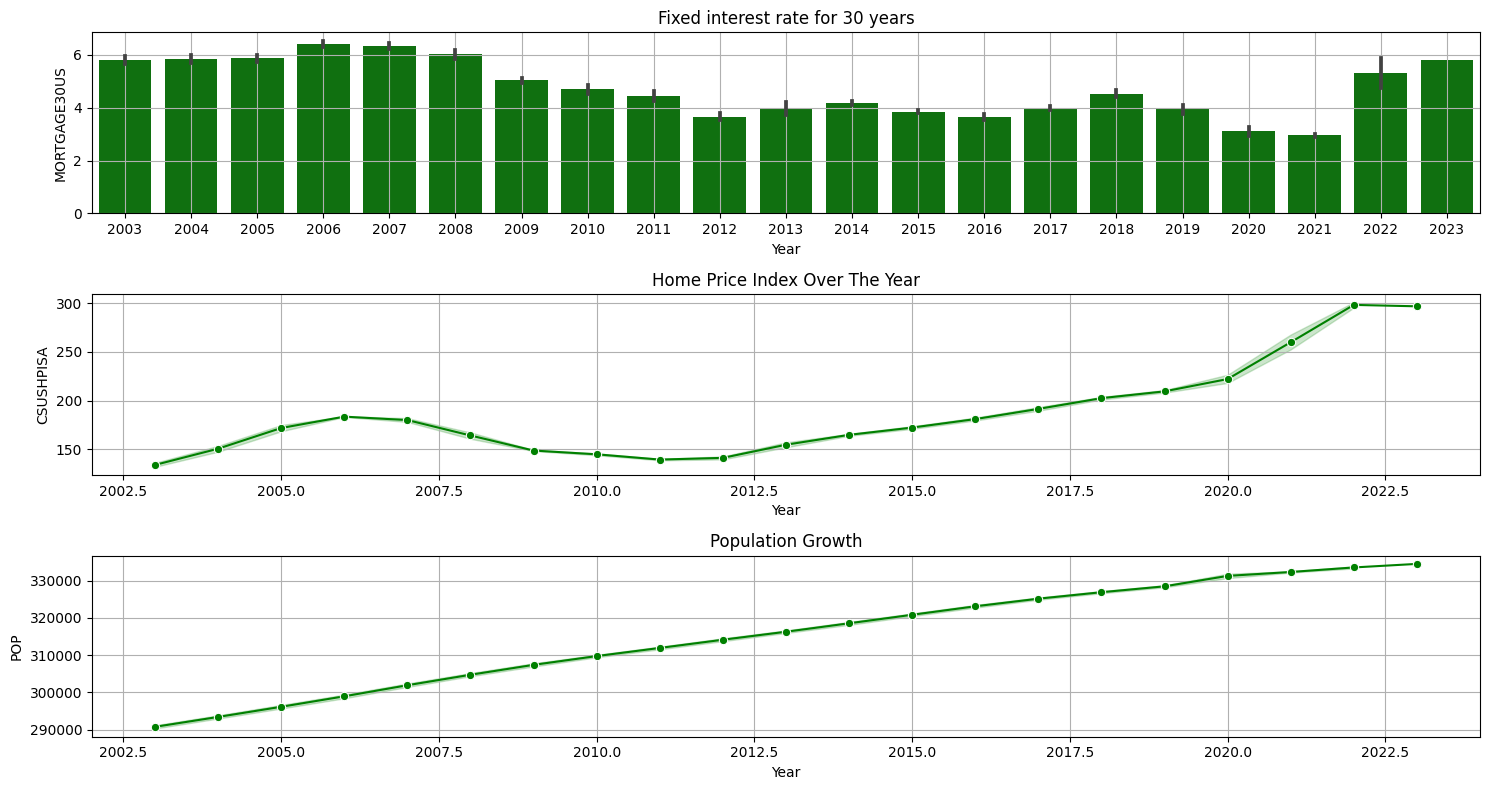

In [196]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(15, 8))

sns.barplot(data=merged_df, x='Year', y='MORTGAGE30US', color='g', ax=ax1).set(title='Fixed interest rate for 30 years')
ax1.grid(True)

sns.lineplot(data=merged_df, x='Year', y='CSUSHPISA', marker='o', color='g', ax=ax2).set(title='Home Price Index Over The Year')
ax2.grid(True)

sns.lineplot(data=merged_df, x='Year', y='POP', marker='o', color='g', ax=ax3).set(title='Population Growth')
ax3.grid(True)
fig.tight_layout()
plt.show()


**`Note :`**


* Despite low-interest rates during the years 2012 to 2019 correlating with a relatively low Home Price Index (HPI), the scenario changed after in 2021. Even with higher interest rates, the HPI increased.

* Because more people wanting houses due to continuous population growth led to an increase in the Home Price Index, showing that demand can outweigh interest rate effects




## **ASPNHSUS vs CSUSHPISA**

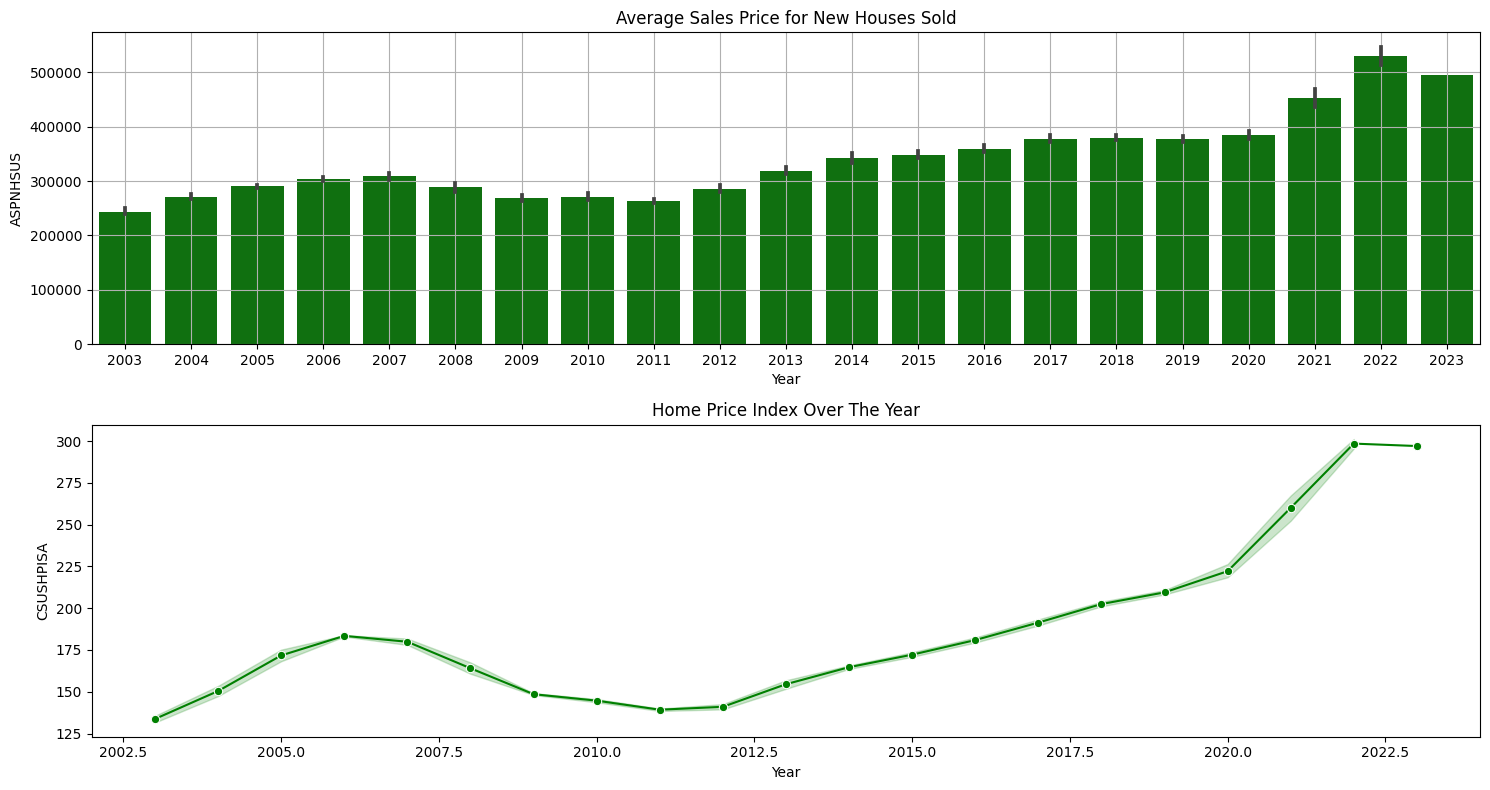

In [197]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

sns.barplot(data=merged_df, x='Year', y='ASPNHSUS', color='g', ax=ax1).set(title='Average Sales Price for New Houses Sold')
ax1.grid(True)

sns.lineplot(data=merged_df, x='Year', y='CSUSHPISA', marker='o', color='g', ax=ax2).set(title='Home Price Index Over The Year')

fig.tight_layout()
plt.show()

**`Note :`**


* In the presented figure, it is observed that whenever the Average Sales Price for New Houses Sold (ASPNHSUS) increases, there is a corresponding increase
  in the Home Price Index (HPI).

* This suggests a positive correlation between the average sales price of new houses and the overall Home Price Index, indicating that as the cost
  of new houses rises, it positively influences the general trend of home prices




## **CPIHOSNS**

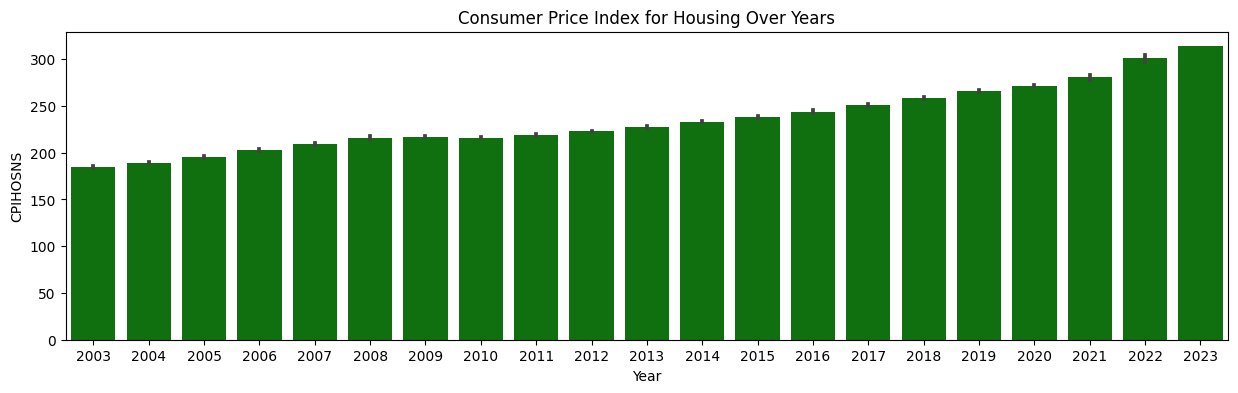

In [198]:
plt.figure(figsize=(15, 4))
sns.barplot(data=merged_df, x='Year', y='CPIHOSNS', color='g').set(title='Consumer Price Index for Housing Over Years')
plt.show()

**`Note :`**

* The Consumer Price Index (CPI) exhibits a consistent upward trend over the years, as shown in the above figure.

* This indicates a continual increase in the overall price level of goods and services, reflecting the impact of inflation on the economy




# **Feature Engineering**

In [199]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

merged_df['Month'] = merged_df['DATE'].dt.month

merged_df['Year'] = merged_df['DATE'].dt.year

merged_df['Day'] = merged_df['DATE'].dt.day

merged_df.drop('DATE',axis=1,inplace=True)

In [200]:
merged_df.columns

Index(['CSUSHPISA', 'ASPNHSUS', 'CPIHOSNS', 'EVACANTUSQ176N', 'GDI', 'GDP',
       'LFUN25TTUSM647S', 'MORTGAGE30US', 'MSACSR', 'MSPNHSUS', 'PERMIT',
       'POP', 'QTAXT01QTAXCAT1USNO', 'TLRESCONS', 'USAUCSFRCONDOSMSAMID',
       'UMCSENT', 'UNRATE', 'FEDFUNDS', 'Month', 'Year', 'Day'],
      dtype='object')

In [201]:
merged_df = merged_df[['CSUSHPISA', 'ASPNHSUS', 'CPIHOSNS', 'EVACANTUSQ176N', 'GDI',
       'GDP', 'LFUN25TTUSM647S', 'MORTGAGE30US', 'MSACSR', 'MSPNHSUS',
       'PERMIT', 'POP', 'QTAXT01QTAXCAT1USNO', 'TLRESCONS',
       'USAUCSFRCONDOSMSAMID', 'UMCSENT', 'UNRATE', 'FEDFUNDS','Day', 'Month',
       'Year', ]]

In [202]:
merged_df.head()

,CSUSHPISA,ASPNHSUS,CPIHOSNS,EVACANTUSQ176N,GDI,GDP,LFUN25TTUSM647S,MORTGAGE30US,MSACSR,MSPNHSUS,PERMIT,POP,QTAXT01QTAXCAT1USNO,TLRESCONS,USAUCSFRCONDOSMSAMID,UMCSENT,UNRATE,FEDFUNDS,Day,Month,Year
0,128.461,230200.0,182.3,14908.0,11245.795,11174.129,4922000.0,5.9160,4.0,181700.0,1808.0,289518.0,77737.0,423049.0,147458.606076,82.4,5.8,1.24,1,1,2003
1,129.355,233400.0,183.2,14908.0,11245.795,11174.129,5102000.0,5.8425,4.5,187000.0,1854.0,289714.0,77737.0,422705.0,148240.809836,79.9,5.9,1.26,1,2,2003
2,130.148,231100.0,184.3,14908.0,11245.795,11174.129,5092000.0,5.7450,4.1,185100.0,1757.0,289911.0,77737.0,418232.0,149022.590076,77.6,5.9,1.25,1,3,2003
3,130.884,237200.0,184.1,15244.0,11377.023,11312.766,5097000.0,5.8125,4.1,189500.0,1803.0,290125.0,56873.0,425493.0,149873.699907,86.0,6.0,1.26,1,4,2003
4,131.735,243700.0,184.5,15244.0,11377.023,11312.766,5199000.0,5.4840,3.9,195500.0,1835.0,290346.0,56873.0,426270.0,150810.139042,92.1,6.1,1.26,1,5,2003



**`Note :`**

* I have Extracted day , month , year features from 'DATE' predictor variable






# **Model**

### **Model Selection**

In [203]:
X = merged_df.drop('CSUSHPISA',axis=1)

y = merged_df['CSUSHPISA']

In [204]:
def model_regression(xtrain,xtest,ytrain,ytest,algorithm):


  for i in algorithm:

    model = i().fit(xtrain,ytrain)


    # predict for train and test accuracy

    y_train_pred = model.predict(xtrain)


    y_test_pred  = model.predict(xtest)

    # R2 score

    r2_training = r2_score(ytrain,y_train_pred)

    r2_testing = r2_score(ytest,y_test_pred)

    # MAE Score
    mae_testing = mean_absolute_error(ytest,y_test_pred)

    # MSE Score
    mse_testing = mean_squared_error(ytest,y_test_pred)

    # RMSE SCore
    rmse_testing = np.sqrt(mean_squared_error(ytest,y_test_pred))

    data = {'Algorithm':i.__name__, 'Training R2 Score':r2_training,'Testing R2 Score':r2_testing,'MAE':mae_testing,'MSE':mse_testing,'RMSE':rmse_testing}


    print(data)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_regression(X_train, X_test, y_train, y_test,[RandomForestRegressor,DecisionTreeRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9997041653566091, 'Testing R2 Score': 0.9979186023342193, 'MAE': 1.322371836734695, 'MSE': 4.084071972571434, 'RMSE': 2.0209086997119474}
{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9665744371239987, 'MAE': 3.2227755102040843, 'MSE': 65.58689228571434, 'RMSE': 8.098573472267468}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9967352867822421, 'MAE': 1.2605304081632547, 'MSE': 6.405947297018257, 'RMSE': 2.530997292969366}
{'Algorithm': 'AdaBoostRegressor', 'Training R2 Score': 0.9919649575941638, 'Testing R2 Score': 0.9938322593634611, 'MAE': 2.797950288469201, 'MSE': 12.102202804349341, 'RMSE': 3.4788220426387637}
{'Algorithm': 'GradientBoostingRegressor', 'Training R2 Score': 0.9999329196773746, 'Testing R2 Score': 0.9951311143633659, 'MAE': 1.8165374157017085, 'MSE': 9.55361855792885, 'RMSE': 3.090892841547382}


**Evaluation Metrics Explanation**


* Random forest Regressor has traning and testig R2 score 99.8%

* R2 score used here to know the model fit and how much the features captures or explains the variance of Target variable .

* To know Absolute error b.w predicted and actual datapoints, here we have used MAE -- we got Absolute error difference 1.15

* RMSE --  To pay more attention to outliers and for less sensitivity we have used rmse  . We got 1.66

**`Note :`**

 * When compard to other models "Randonforestregressor" minimises the error and got good model fit so i have chosen "RandomforestRegressor" Model


### **Model Bulding**

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor().fit(X_train, y_train)


train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

train_r2 = r2_score(y_train,train_pred)

test_r2 = r2_score(y_test, test_pred)

print(f'Training Accuracy : {train_r2}',f'Training Accuracy : {test_r2}')


Training Accuracy : 0.9997294508609645 Training Accuracy : 0.9976402430623369


### **Feature Importance**

In [207]:
importance = model.feature_importances_
importance

array([0.01981506, 0.1672104 , 0.00246507, 0.04686286, 0.08838803,
       0.00572501, 0.00138643, 0.001272  , 0.02881854, 0.00110944,
       0.10711833, 0.00055439, 0.06460765, 0.39662017, 0.00794711,
       0.03784264, 0.00074571, 0.        , 0.00039892, 0.02111224])

In [208]:
feature = [i for i in X.columns]
feature

['ASPNHSUS',
 'CPIHOSNS',
 'EVACANTUSQ176N',
 'GDI',
 'GDP',
 'LFUN25TTUSM647S',
 'MORTGAGE30US',
 'MSACSR',
 'MSPNHSUS',
 'PERMIT',
 'POP',
 'QTAXT01QTAXCAT1USNO',
 'TLRESCONS',
 'USAUCSFRCONDOSMSAMID',
 'UMCSENT',
 'UNRATE',
 'FEDFUNDS',
 'Day',
 'Month',
 'Year']

In [209]:
feature_importance = {}

for i in range(len(feature)):
     feature_importance.update({feature[i]:importance[i]*100})

feature_importance

{'ASPNHSUS': 1.9815062038407982,
 'CPIHOSNS': 16.721040346827138,
 'EVACANTUSQ176N': 0.24650682994948586,
 'GDI': 4.68628606828846,
 'GDP': 8.838802767907456,
 'LFUN25TTUSM647S': 0.572500606571609,
 'MORTGAGE30US': 0.1386434883471053,
 'MSACSR': 0.12719954515456447,
 'MSPNHSUS': 2.881853975942913,
 'PERMIT': 0.11094376279571559,
 'POP': 10.711832907087237,
 'QTAXT01QTAXCAT1USNO': 0.055439462548059586,
 'TLRESCONS': 6.460764949954369,
 'USAUCSFRCONDOSMSAMID': 39.66201661849662,
 'UMCSENT': 0.7947111388679193,
 'UNRATE': 3.784264155945005,
 'FEDFUNDS': 0.07457062706619276,
 'Day': 0.0,
 'Month': 0.03989247020504286,
 'Year': 2.111224074204317}

In [210]:
sorted_feature_importance  = dict(sorted(feature_importance.items(),key=lambda item : item[1],reverse=True))
sorted_feature_importance

{'USAUCSFRCONDOSMSAMID': 39.66201661849662,
 'CPIHOSNS': 16.721040346827138,
 'POP': 10.711832907087237,
 'GDP': 8.838802767907456,
 'TLRESCONS': 6.460764949954369,
 'GDI': 4.68628606828846,
 'UNRATE': 3.784264155945005,
 'MSPNHSUS': 2.881853975942913,
 'Year': 2.111224074204317,
 'ASPNHSUS': 1.9815062038407982,
 'UMCSENT': 0.7947111388679193,
 'LFUN25TTUSM647S': 0.572500606571609,
 'EVACANTUSQ176N': 0.24650682994948586,
 'MORTGAGE30US': 0.1386434883471053,
 'MSACSR': 0.12719954515456447,
 'PERMIT': 0.11094376279571559,
 'FEDFUNDS': 0.07457062706619276,
 'QTAXT01QTAXCAT1USNO': 0.055439462548059586,
 'Month': 0.03989247020504286,
 'Day': 0.0}

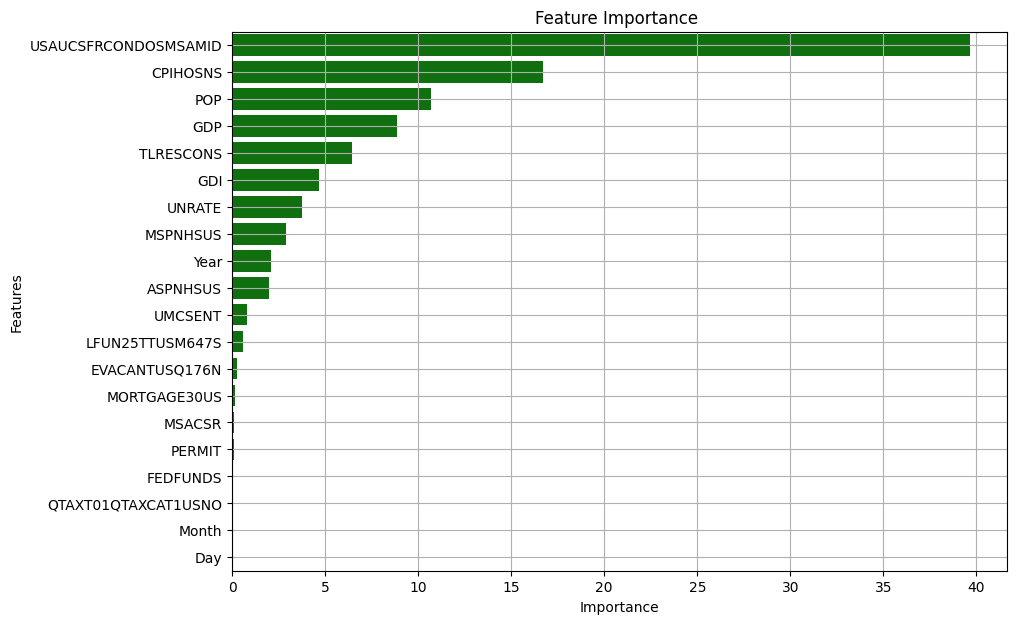

In [211]:
plt.figure(figsize=(10,7))
sns.barplot(x=[i for i in sorted_feature_importance.values()],y=[i for i in sorted_feature_importance.keys()],color='g').set(title='Feature Importance ',xlabel='Importance',ylabel='Features')
plt.grid()

plt.show()

**Note :**

```
# Zillow Home Value Index (USAUCSFRCONDOSMSAMID) has moderate feature importance when compared to others predictor variables
```

